In [1]:
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('aggr.csv')
df['time'] = pd.to_datetime(df['time'])

,time,zone_id,value,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
0,2004-01-01 00:00:00,1,16853.0,46.0,38.0,44.0,45.0,42.0,44.0,45.0,43.0,41.0,42.0,36.0
1,2004-01-01 01:00:00,1,16450.0,46.0,36.0,42.0,43.0,42.0,43.0,44.0,44.0,39.0,43.0,32.0
2,2004-01-01 02:00:00,1,16517.0,45.0,35.0,40.0,41.0,40.0,42.0,41.0,42.0,36.0,43.0,31.0
3,2004-01-01 03:00:00,1,16873.0,41.0,30.0,36.0,37.0,39.0,38.0,40.0,34.0,35.0,39.0,30.0
4,2004-01-01 04:00:00,1,17064.0,39.0,30.0,34.0,33.0,40.0,38.0,35.0,30.0,33.0,35.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791995,2008-07-07 19:00:00,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791996,2008-07-07 20:00:00,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791997,2008-07-07 21:00:00,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791998,2008-07-07 22:00:00,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


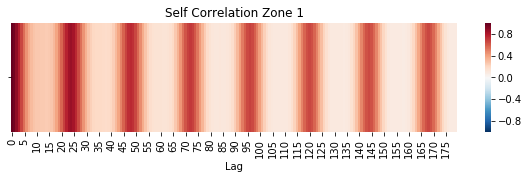

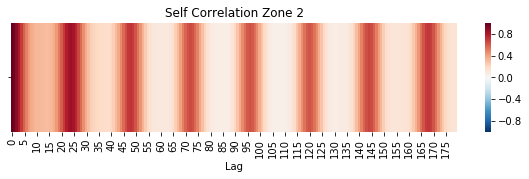

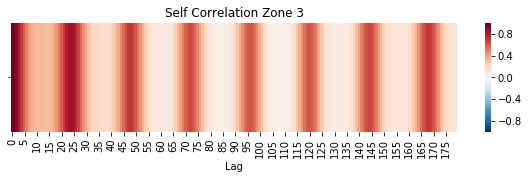

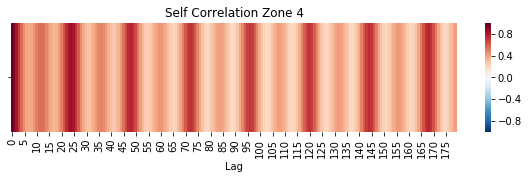

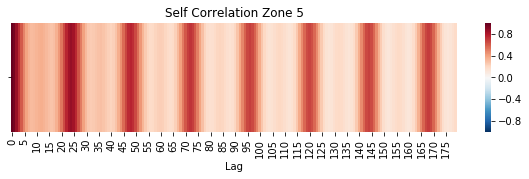

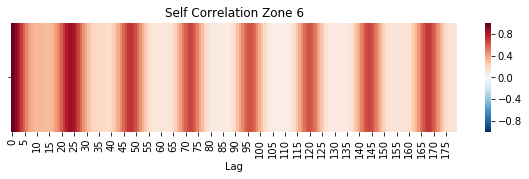

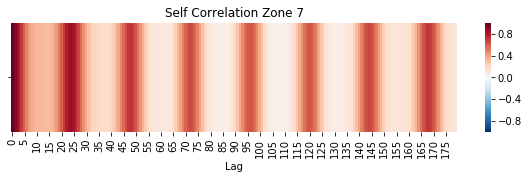

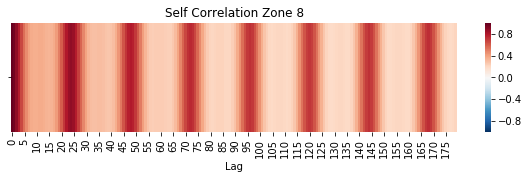

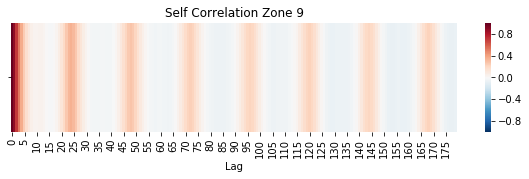

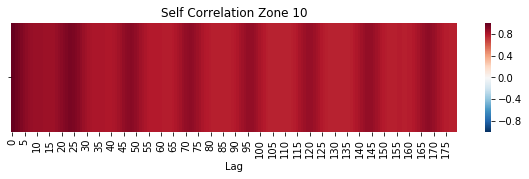

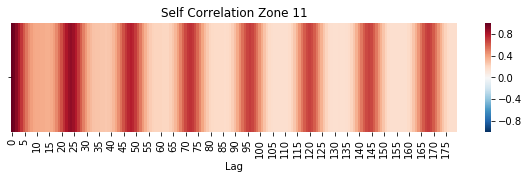

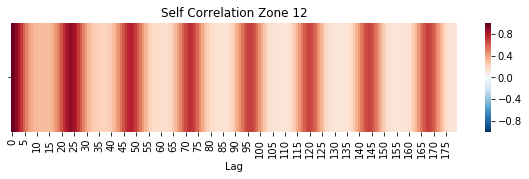

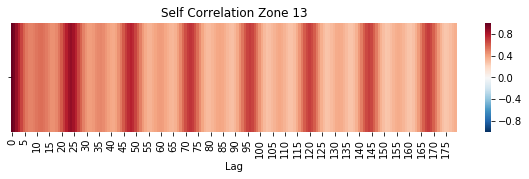

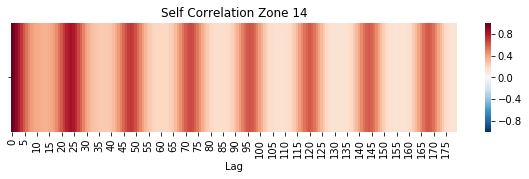

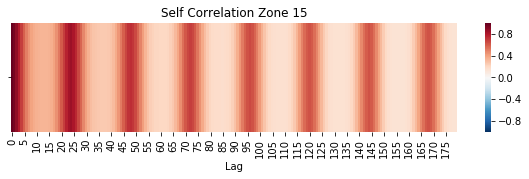

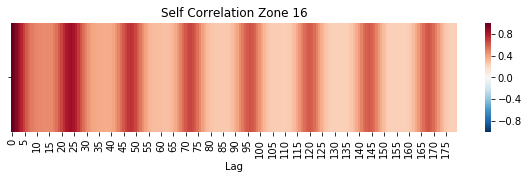

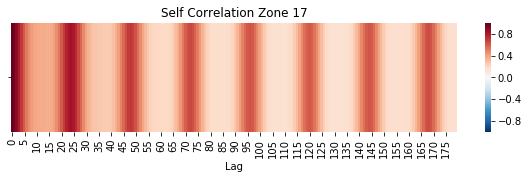

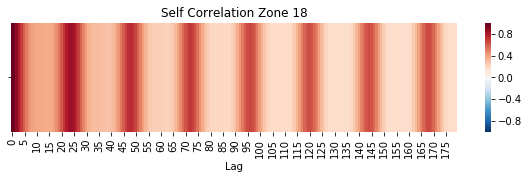

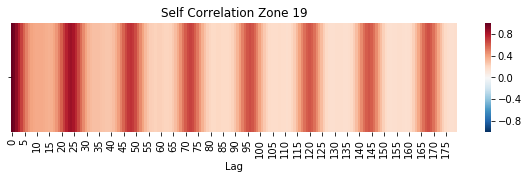

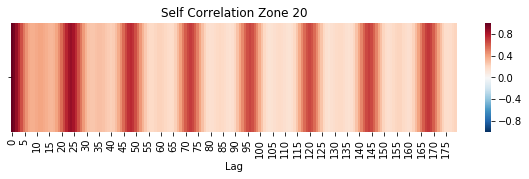

In [17]:
def crossCorrelation(data, title='Correlation', idx=0):
    data.sort_values('time')
    rss = []
#     for i in range(1, 12):
    rs = [crosscorr(data['value'], data['value'], lag) for lag in range(0, 180)]
    rss.append(rs)
    rss = pd.DataFrame(rss)
    f,ax = plt.subplots(figsize=(10,2))
    sns.heatmap(rss,cmap='RdBu_r',ax=ax, center=0, vmin=-1, vmax=1)
    ax.set(title=title, xlabel='Lag',ylabel='')
    ax.set_yticklabels([f'' for item in ax.get_yticks()])
    ax.set_xticklabels([f'{int(item)}' for item in ax.get_xticks()])
    plt.savefig(f'result/correlation/zone-{idx}.png')
    plt.show()
for i in range(1, 21):
    data = df[df['zone_id']==i]
    crossCorrelation(data, f'Self Correlation Zone {i}', i)

In [15]:
df.fillna(0)
data = df[df['zone_id']==0]
res = scipy.signal.correlate([1,2,3], [np.nan,3,4])

NameError: name 'np' is not defined

In [3]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

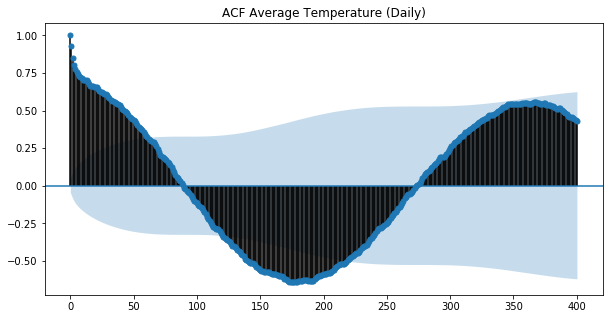

In [156]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(aggr[f'mean'].fillna(0).resample('D').mean(), lags=400, ax=ax, title=f'ACF Average Temperature (Daily)')
plt.savefig(f'result/weather/acf_mean_day.png')
plt.show()

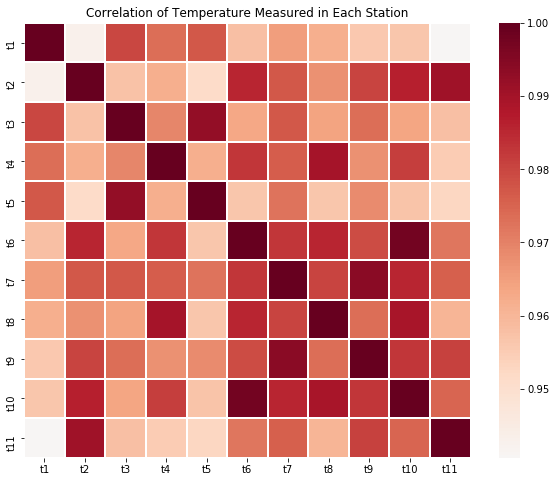

In [93]:
station = [f't{i}' for i in range(1, 12)]
fig, ax = plt.subplots(figsize=(10,8))
data = df[station]
corr = data.corr()
ax.set(title='Correlation of Temperature Measured in Each Station')
sns.heatmap(corr, xticklabels=corr.columns, ax=ax, yticklabels=corr.columns, cmap='RdBu_r', linewidths=1, center=0.94)
plt.savefig('result/weather/correlation.png')
plt.show()

In [153]:
aggr

,t1,value,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,max,mean,min,std,range
time,,,,,,,,,,,,,,,,,
2004-01-01 00:00:00,46.0,1397668.0,38.0,44.0,45.0,42.0,44.0,45.0,43.0,41.0,42.0,36.0,46.0,42.363636,36.0,3.074824,10.0
2004-01-01 01:00:00,46.0,1351507.0,36.0,42.0,43.0,42.0,43.0,44.0,44.0,39.0,43.0,32.0,46.0,41.272727,32.0,4.076540,14.0
2004-01-01 02:00:00,45.0,1315742.0,35.0,40.0,41.0,40.0,42.0,41.0,42.0,36.0,43.0,31.0,45.0,39.636364,31.0,4.056420,14.0
2004-01-01 03:00:00,41.0,1308023.0,30.0,36.0,37.0,39.0,38.0,40.0,34.0,35.0,39.0,30.0,41.0,36.272727,30.0,3.744086,11.0
2004-01-01 04:00:00,39.0,1344117.0,30.0,34.0,33.0,40.0,38.0,35.0,30.0,33.0,35.0,34.0,40.0,34.636364,30.0,3.294624,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-07-07 19:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-07 20:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-07 21:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


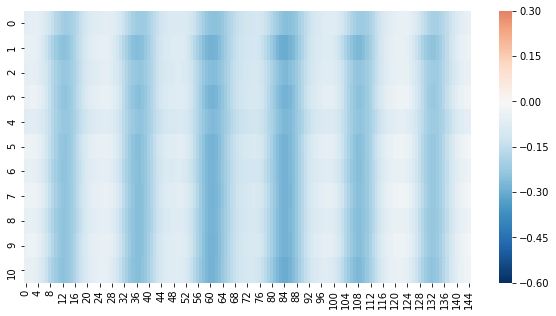

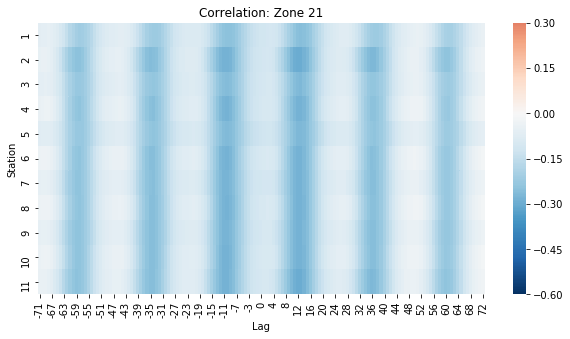

In [102]:
crossCorrelation(aggr)

In [114]:
aggr

,t1,value,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
time,,,,,,,,,,,,
2004-01-01 00:00:00,46.0,1397668.0,38.0,44.0,45.0,42.0,44.0,45.0,43.0,41.0,42.0,36.0
2004-01-01 01:00:00,46.0,1351507.0,36.0,42.0,43.0,42.0,43.0,44.0,44.0,39.0,43.0,32.0
2004-01-01 02:00:00,45.0,1315742.0,35.0,40.0,41.0,40.0,42.0,41.0,42.0,36.0,43.0,31.0
2004-01-01 03:00:00,41.0,1308023.0,30.0,36.0,37.0,39.0,38.0,40.0,34.0,35.0,39.0,30.0
2004-01-01 04:00:00,39.0,1344117.0,30.0,34.0,33.0,40.0,38.0,35.0,30.0,33.0,35.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-07-07 19:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-07 20:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-07 21:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
aggr.resample(rule='D').mean()

,t1,value,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
time,,,,,,,,,,,,
2004-01-01,44.333333,1.448289e+06,41.875000,39.708333,44.000000,41.750000,46.625000,43.875000,44.375000,41.208333,46.041667,41.125000
2004-01-02,48.458333,1.493542e+06,48.833333,42.166667,50.458333,43.041667,50.708333,47.166667,47.958333,46.166667,50.125000,49.083333
2004-01-03,56.833333,1.334606e+06,57.458333,52.916667,59.041667,53.625000,56.708333,57.208333,57.000000,57.125000,57.166667,61.166667
2004-01-04,65.000000,1.234683e+06,61.750000,57.250000,65.791667,57.333333,63.083333,64.458333,64.833333,62.125000,64.250000,63.958333
2004-01-05,62.000000,1.473262e+06,54.041667,49.625000,65.833333,45.208333,61.708333,52.916667,62.500000,46.958333,61.416667,51.958333
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-07-03,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-04,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-05,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
plt.close()
aggr['month'] = df['time'].apply(lambda x:x.strftime("%MM"))
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.boxplot(y='t1', data=aggr, ax=ax)
g.legend_.remove()
plt.show()

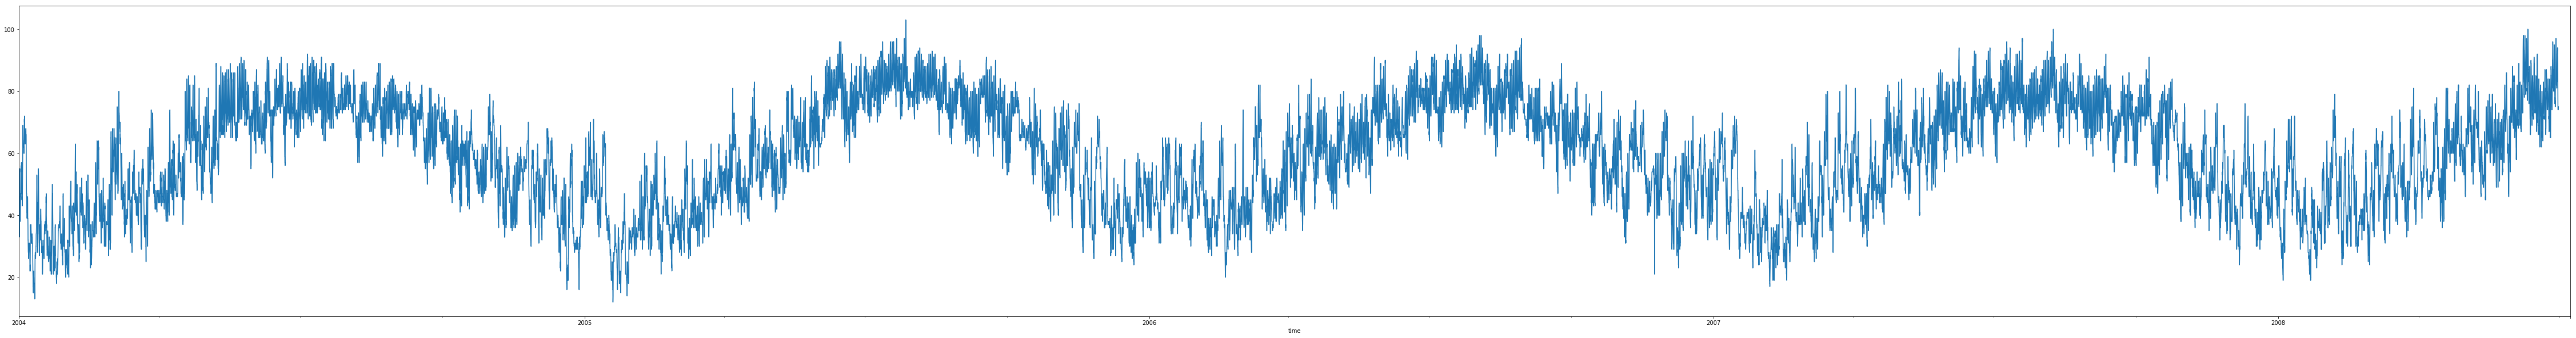

In [126]:
plt.show()

In [127]:
colname = [f't{i}' for i in range(1, 12)]
aggr['max'] = aggr[colname].max(axis=1)
aggr['mean'] = aggr[colname].mean(axis=1)
aggr['min'] = aggr[colname].min(axis=1)
aggr['std'] = aggr[colname].std(axis=1)

In [140]:
fig, ax = plt.subplots(figsize=(80, 8))
plt.scatter(x=aggr['time'], y=aggr['mean'], ax=ax)
plt.show()

KeyError: 'time'

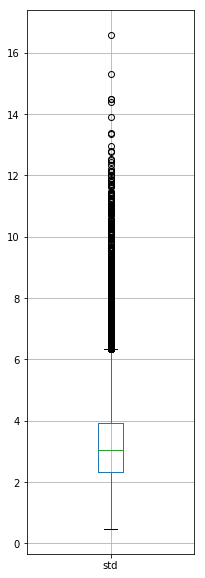

In [159]:
fig, ax = plt.subplots(figsize=(3, 10))
aggr.boxplot('std', ax=ax)
plt.show()

KeyError: "None of ['time'] are in the columns"

,t1,value,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,max,mean,min,std,range
time,,,,,,,,,,,,,,,,,
2004-01-01 00:00:00,46.0,1397668.0,38.0,44.0,45.0,42.0,44.0,45.0,43.0,41.0,42.0,36.0,46.0,42.363636,36.0,3.074824,10.0
2004-01-01 01:00:00,46.0,1351507.0,36.0,42.0,43.0,42.0,43.0,44.0,44.0,39.0,43.0,32.0,46.0,41.272727,32.0,4.076540,14.0
2004-01-01 02:00:00,45.0,1315742.0,35.0,40.0,41.0,40.0,42.0,41.0,42.0,36.0,43.0,31.0,45.0,39.636364,31.0,4.056420,14.0
2004-01-01 03:00:00,41.0,1308023.0,30.0,36.0,37.0,39.0,38.0,40.0,34.0,35.0,39.0,30.0,41.0,36.272727,30.0,3.744086,11.0
2004-01-01 04:00:00,39.0,1344117.0,30.0,34.0,33.0,40.0,38.0,35.0,30.0,33.0,35.0,34.0,40.0,34.636364,30.0,3.294624,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-07-07 19:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-07 20:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-07 21:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
